<a href="https://colab.research.google.com/github/F-Palmieri/PRML_UPC/blob/main/LogisticRegression_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Linear and Polynomial Features


---
References: 


1.   S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
2.   Dataset used, refer https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
3.   gitHub https://github.com/Bharat-Reddy/Bank-Marketing-Analysis




In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import preprocessing

In [3]:
# Import Data
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd 
data=pd.read_csv('gdrive/MyDrive/Colab Notebooks/full_ohe.csv')
data.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [5]:
data.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

In [6]:
# Saperating features and result vectors
X = data.drop('y', axis=1).values
y = data['y'].values

**Test Train Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_scaled = scaler.transform(X_train_std)
X_test_scaled = scaler.transform(X_test_std)


In [60]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [61]:
X_train_poly1 = poly_features_1.fit_transform(X_train_std)
X_train_poly2 = poly_features_2.fit_transform(X_train_std)

In [63]:
 X_train_poly3 = poly_features_3.fit_transform(X_train_std) # This line may crash the whole session. 

**Logistic Regression with Linear Features**

In [64]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test_std))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [65]:
# Logistic Regression with Polynomial Features of degree=2


logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test_std))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
# Logistic Regression with Polynomial Features of degree=3


logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test_std))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [69]:
# Comparing the results

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table



,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.734401,0.747477,0.767793
1,Precision,0.654905,0.649671,0.736847
2,Recall,0.780071,0.809058,0.786533
3,F1 Score,0.712029,0.720657,0.760880


# Model evaluation after appliying PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_pca = pca.fit_transform(X)
x_pca.shape

(73668, 24)

Observation : To capture 90% of variance we need only 24 Features out of 56

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [72]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly1 = poly_features_1.fit_transform(X_train_std)
X_train_poly2 = poly_features_2.fit_transform(X_train_std)
X_train_poly3 = poly_features_3.fit_transform(X_train_std)

In [73]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test_std))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [74]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test_std))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [75]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test_std))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [76]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.734401,0.747477,0.767793
1,Precision,0.654905,0.649671,0.736847
2,Recall,0.780071,0.809058,0.786533
3,F1 Score,0.712029,0.720657,0.760880


Observation : We can see that with just 24 Features instead 56 Features we can get the same accuracy

# Plotting the ROC Curve for Better Visualization


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [15]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
X_poly2 = poly_features_2.fit_transform(X_train_std)
logisticRegr.fit(X_poly2, y_train)
predict = logisticRegr.predict(poly_features_2.fit_transform(X_test_std))
#data['predict'] = predict
TP2 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN2 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP2 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN2 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P2 = np.sum(y_test)
N2 = len(y_test) - P2
phat2 = logisticRegr.predict_proba(poly_features_2.fit_transform(X_test_std))[:,1]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [16]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
X_poly1 = poly_features_1.fit_transform(X_train_std)
logisticRegr.fit(X_poly1, y_train)
predict = logisticRegr.predict(poly_features_1.fit_transform(X_test_std))
#data['predict'] = predict
TP1 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN1 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP1 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN1 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P1 = np.sum(y_test)
N1 = len(y_test) - P1
phat1 = logisticRegr.predict_proba(poly_features_1.fit_transform(X_test_std))[:,1]



In [17]:
logisticRegr = LogisticRegression(C=100.0, random_state=1, solver='sag', max_iter=100)
X_poly3 = poly_features_3.fit_transform(X_train_std)
logisticRegr.fit(X_poly3, y_train)
predict = logisticRegr.predict(poly_features_3.fit_transform(X_test_std))
#data['predict'] = predict
TP3 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN3 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP3 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN3 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P3 = np.sum(y_test)
N3 = len(y_test) - P3
phat3 = logisticRegr.predict_proba(poly_features_3.fit_transform(X_test_std))[:,1]



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


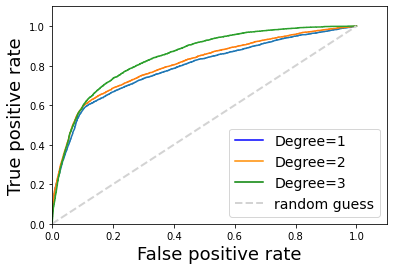

In [18]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, phat1)
plt.plot(fpr1, tpr1)
plt.plot(FP1/N1, TP1/P1, label = 'Degree=1', color='blue')

fpr2, tpr2, thresholds2 = roc_curve(y_test, phat2)
plt.plot(fpr2, tpr2)
plt.plot(FP2/N2, TP2/P2, label = 'Degree=2', color='darkorange')

fpr3, tpr3, thresholds3 = roc_curve(y_test, phat3)
plt.plot(fpr3, tpr3)
plt.plot(FP3/N3, TP3/P3, label = 'Degree=3', color='green')

x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()

